# ECD - Avaliação Semanal 3

### Questão 1:   
Uma moeda justa é lançada 10 vezes. Qual é a probabilidade que saiam 6 caras?   

Escolha uma opção:   
<font color='red'>a. 0,20</font>   
b. 0,3   
c. 0,6   
d. 0,1   
e. 0,9   

Sucesso = Cara = 1<br>
Falha  = Coroa = 0<br>
Distribuição Binomial.

In [1]:
# função binomial para calcular o valor da probabilidade
import math
def binomial(n,p,k):
    """Funcao binomial para calcular o valor da probabilidade
    Parametros:
        - n: número de tentativas ou repetições
        - p: probabilidade de sucesso em cada tentativa
        - k: número de sucessos
    Retorno:
        - pk: probabilidade da ocorrência
    """
    C = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    pk = C*(p**k)*(1-p)**(n-k)
    return pk

In [2]:
# cálculo pela função
# valor teórico para que saiam 6 caras
n = 10      # numero de tentativas
p = 1/2    # p(X=cara) = 1/2
k = 6       # k = 6 caras
print('Probabilidade:', binomial(n,p,k))

Probabilidade: 0.205078125


In [3]:
import random
from scipy.stats import binom
#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k)
#binom.pmf(k,n,p)

ns = 1000 # numero de experimentos
X = [0,1] # espaço amostral X=1 (Cara=Sucesso) e X=0 (Coroa=Falha)
n = 10     # numero de tentativas
k = 0      # inicializa k para contar os sucessos
for i in range(0,ns):
    saida = []
    for j in range(0,n):
        moeda = random.choice(X)
        saida.append(moeda)
    ncaras = 0
    for s in saida:
        if(s == 1):
            ncaras = ncaras + 1
    if(ncaras == 6):       # ncaras ==6 é o evento que se quer calcular
        k = k + 1          # soma dos sucessos     

print('Valor teórico:', binom.pmf(k=6, n=10, p=1/2))
print('Valor obtido = ', k/ns)

Valor teórico: 0.20507812500000022
Valor obtido =  0.195


### Questão 2:   
O departamento de análise de dados de um banco recebe, em média, 5 solicitações por hora. Qual a probabilidade de receber 2 solicitações numa hora selecionada aleatoriamente? (Dica: Use a distribuição de Poisson)   

Escolha uma opção:   
a. 0,14   
b. 0,20   
c. 0,45   
d. 0,01   
<font color='red'>e. 0,08</font>

In [4]:
import numpy as np
import math
"""Funcao de Poisson para calcular o valor da probabilidade
   Parametros:
       - ldb: lâmbda ou taxa (no. de ocorrências por tempo, comprimento etc)
       - k: número de ocorrências que se quer verificar
   Retorno:
       - pk: probabilidade da ocorrência
"""
def Poisson(lbd, k):
    pk = np.exp(-lbd)*(lbd**k)/math.factorial(k)
    return pk

In [5]:
lbd = 5 #taxa de ocorrências
k = 2   #número de ocorrências
print("P(k = 2) = ", round(Poisson(lbd,k),2))

P(k = 2) =  0.08


### Questão 3:   
O tempo entre falhas em uma linha de produção, representado pela a variável aleatória X, segue o modelo exponencial com  falhas por mês, ou seja,

f(x)={2e(−2x),x≥0   
      0,x<0   

Calcule E[X] e V(X).   

Escolha uma opção:   
a. E[X]=0, V(X)=1   
b. <font color='red'>E[X]=1/2 e V(X)=1/4</font>   
c. E[X]=1/2, V(X)=4/9   
d. E[X]=3/2, V(X)=6/5   
e. E[X]=1/4, V(X)=2/5   

Fórmula geral da distribuição exponencial:   
f(x)={alpha.e(−alpha.x),x≥0   
0,x<0   
E[X]=1/alpha   
V(X)=1/alpha^^2

Portanto:   
alpha = 2   
E[X] = 1/2   
V(X) = 1/4

In [6]:
# No exemplo, alpha =2 
# na função print s=string, f=número
alpha = 2
print('E[X]=%.2f, V(X)=%.2f' % (1/alpha, 1/(alpha**2)))

E[X]=0.50, V(X)=0.25


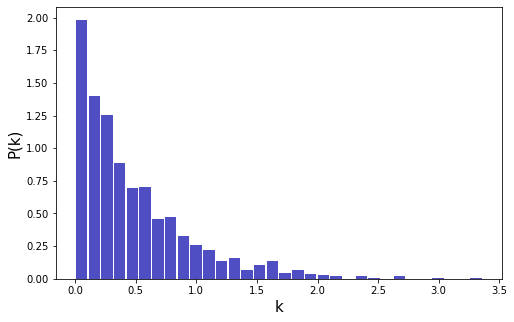

Esperanca teorica: 0.5 Média amostral: 0.48164746444458734
Variância teórica: 0.25 Variância amostral: 0.2247688292576119


In [7]:
# resolvendo com scipy.stats
# aqui a entrada da função é 1/alpha
from scipy.stats import expon
import matplotlib.pyplot as plt
import numpy as np

alpha = 2
X = expon.rvs(scale=1/alpha,size=1000)
plt.figure(figsize=(8,5))

P, bins, ignored = plt.hist(X, bins='auto', density=True, color='#0504aa',alpha=0.7, rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

print('Esperanca teorica:', 1/alpha, 'Média amostral:', np.mean(X))
print('Variância teórica:', 1/alpha**2,'Variância amostral:', np.var(X))

### Questão 4:   
A variável aleatória X tem função densidade de probabilidade dada por:   

f(x)={3x^^2,se 0≤x≤1   
0 caso contrário

Calcule o valor esperado de X.   

Escolha uma opção:   
a. E[X]=5/4   
b. E[X]=0   
<font color='red'>c. E[X]=3/4</font>   
d. E[X]=1/2   
e. E[X]=2   

Variável aleatória: função que associa todo evento do espaço amostral a um único número real |R.   
Variável aleatória contínua:   

E[X] = integrate x.f(x).dx from (-infinity) to (+infinity)   

No exemplo:   
f(x) = 3.x^2   
E[X] = integrate x.3.x^2.dx from 0 to 1   
E[X] = integrate 3.x^3.dx from 0 to 1   
E[X] = 3 * x^4 / 4 (x=1) - 3 * x^4 / 4 (x=0) = 3/4 - 0 = 3/4   


Calculando pelo https://www.wolframalpha.com/   
integrate x*3*x^2 from 0 to 1   

integral_0^1 x 3 x^2 dx = 3/4 = 0.75
    

### Questão 5:   

A variável aleatória X tem função densidade de probabilidade dada por:   

f(x)={3x^^2,se 0≤x≤1   
0 caso contrário

Calcule a variância de X. (Dica: Use https://www.wolframalpha.com)

Escolha uma opção:   
a. 0,054   
b. 0,090   
<font color='red'>c. 0,037</font>    
d. 0,012   
e. 0,045

Variável aleatória: função que associa todo evento do espaço amostral a um único número real |R.   
Variável aleatória contínua:   

E[X] = integrate x.f(x).dx from (-infinity) to (+infinity)   
V(X) = E[X^2] - E[X]^2

No exemplo:   
f(x) = 3.x^^2   
E[X] = integrate x.3.x^2.dx from 0 to 1   
E[X] = integrate 3.x^3.dx from 0 to 1   
E[X] = 3 * x^4 / 4 (x=1) - 3 * x^4 / 4 (x=0) = 3/4 - 0 = 3/4   
E[X]^2 = 9/16   

E[X^2] = integrate x^2.3.x^2 from 0 to 1   
E[X^2] = integrate 3.x^4.dx from 0 to 1   
E[X^2] = 3 * x^5 / 5 (x=1) - 3 * x^5 / 5 (x=0) = 3/5 - 0 = 3/5



Calculando pelo https://www.wolframalpha.com/   
integrate x^2*3*x^2 from 0 to 1   

integral_0^1 x^2 3 x^2 dx = 3/5 = 0.6

In [20]:
E_X = 3/4
E_X_square = 3/5
V_X = E_X_square - E_X**2
print('V(X) = %.3f' % V_X)
print('E[X]=%.3f, E[X]^2=%.3f, E[X^2]=%.3f, V(X)=%.3f' % (E_X, E_X*2, E_X_square, V_X))
print(f"E[X]={E_X}\tE[X]^2={E_X*2}\tE[X^2]={E_X_square}\tV(X)={round(V_X,3)}")

V(X) = 0.037
E[X]=0.750, E[X]^2=1.500, E[X^2]=0.600, V(X)=0.037
E[X]=0.75	E[X]^2=1.5	E[X^2]=0.6	V(X)=0.037
